In [217]:
!pip install openpyxl
!pip install pandas
!pip install matplotlib

Looking in indexes: https://mirrors.tuna.tsinghua.edu.cn/pypi/web/simple



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://mirrors.tuna.tsinghua.edu.cn/pypi/web/simple



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://mirrors.tuna.tsinghua.edu.cn/pypi/web/simple



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# 准备数据

In [218]:
import pandas as pd


is_load_corr = False # 直接导入相关矩阵
corr_path = './corr.xlsx' # 兼容excel旧版,xls文件
data_path = './data.xlsx'

## 直接导入相关系数 optional

In [219]:
if is_load_corr:
    corr_matrix = pd.read_excel(corr_path) 

## 导入序列

In [220]:
data = pd.read_excel(data_path)
# syn data
# np.random.seed(0)
# data = pd.DataFrame(np.random.randn(5, 10))

## 计算相关系数

In [221]:
corr_matrix = data.corr()

# 定义绘制patch的函数


In [222]:

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib.patches import Rectangle
from matplotlib import colormaps


def draw_rect(ax, ax_row, ax_col):
    width, height = 1, 1
    rect = Rectangle((ax_col, ax_row), width, height, facecolor='white', edgecolor='black', linewidth=1, alpha=1)
    ax.add_patch(rect)


# 定义绘制椭圆的函数
def draw_ellipse(ax, ax_row, ax_col, value,cmap, norm_func,scale_e_func=lambda x:x):
    # 椭圆的宽度和高度
    # 将value作为偏心率,width始终为1计算height
    value = scale_e_func(value)
    width = 1
    height = ((1 - value ** 2) / width ** 2) ** (1 / 2)

    # 椭圆的颜色，根据相关性的正负决定
    color = cmap(norm(value))
    # 椭圆的透明度，根据相关性的大小决定
    angle = 45 if value < 0 else 135
    alpha = abs(value)
    # 创建椭圆
    ell = Ellipse((ax_col + 0.5, ax_row + 0.5), width, height, angle=angle, color=color, alpha=alpha)
    ax.add_patch(ell)


# 定义没有关系(对角线位置)的画法
def draw_no_relationship(ax, ax_row, ax_col):
    [x1, x2] = ax_col, ax_col + 1
    [y1, y2] = ax_row, ax_row + 1
    ax.plot((x2, x1), (y1, y2), color='red')




# 设置绘图

## 预定义参数

In [223]:
# color map name
color_map = 'coolwarm'

# 标签文字
# 自定义标签文字
# labels = ['']
# 获取excel的表头,作为标签文字
labels = data.columns.tolist()
is_diag_label = True
is_x_label = True
is_y_label = True

# 显示阈值,在绘图中,仅绘制绝对值大于门限值的
threshold = 0.5

# scale the e (Eccentricity)
# in default , the abs of value domain map to the e(value(0,1)->e(0,1))
# scale_e = lambda x:x
scale_e = lambda x: (x-threshold)*threshold/2+threshold*3/2 # value(threshold,1)->e(threshold*3/2,1)


## 绘图

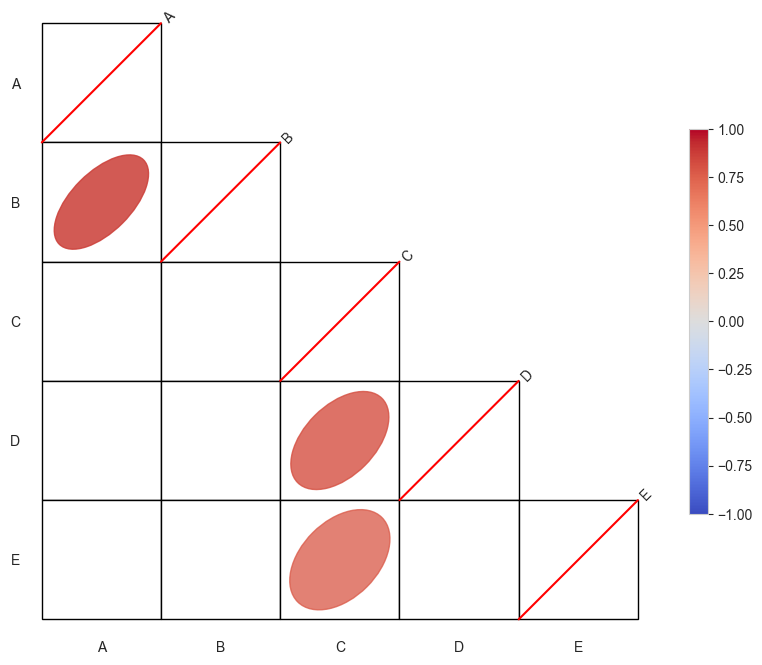

In [224]:
fig, ax = plt.subplots(figsize=(10, 10))

# 设置一定边距,防止矩形绘制时导致在边缘的颜色变化
ax.set_xlim(-0.1,corr_matrix.shape[0]+0.1)
ax.set_ylim(-0.1,corr_matrix.shape[1]+0.1)

# 反转y轴,让主对角线(左上到右下)是无相关性的一组
ax.invert_yaxis()

# 设置colorbar
# 设置colorbar的颜色
cmap=colormaps[color_map]
# colorbar的缩放,缩放到-1,1,colorbar的最低颜色和最高颜色的对应值
norm = plt.Normalize(vmin=-1, vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# shrink 表示colorbar的缩放,默认是1
plt.colorbar(sm, ax=ax, orientation='vertical',shrink=0.5) 

# 设置xy坐标轴同等比例,防止绘制出现长方形
ax.set_aspect('equal')

# 隐藏网格
ax.grid(False)

# 隐藏外边缘线
for spine in ax.spines.values():
    spine.set_visible(False)

# 在热力图的每个单元格上绘制椭圆
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        if i >= j:  # 对角线不绘制
            cell_value = corr_matrix.iloc[i, j]
            draw_rect(ax,i,j)
            if abs(cell_value) > threshold:
                if i == j:
                    draw_no_relationship(ax,i,j)
                else:
                    draw_ellipse(ax, i, j, cell_value,cmap,norm,scale_e_func=scale_e)

# 设置坐标轴
# 斜坐标轴(沿着主对角线)
if is_diag_label:
    for i,label in enumerate(labels):
        ax.text(i+1,i,label,rotation=45)
if is_x_label or is_y_label:
    # 设置标签所在的位置,这里设置每个格子对应的中间
    position = [0.5+x for x in range(len(labels))]
    # x坐标
    if is_x_label:
        plt.xticks(ticks=position, labels=labels)
    # y坐标
    if is_y_label:
        plt.yticks(ticks=position, labels=labels)
    
# 显示图形
plt.show()